In [1]:
%cd ..

import pandas as pd
import numpy as np 
import glob
import matplotlib.pyplot as plt

import sys,os

import functions

import nelpy as nel  # main nelpy imports
import nelpy.plotting as npl  # optional plotting import

import math
import seaborn as sns
from tqdm import tqdm

d:\github\ripple_heterogeneity\python


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
animal = ['AB1','AB3','AB4','AYA4','AYA6','AYA7','AYA9','AYA10',
    'OML5','OML3','OML7','OML8','OML10','OML18','OML19',
    'Wmaze2\OR15','Wmaze2\OR18','Wmaze3\OR22','Wmaze3\OR21','Wmaze3\OR23',
    'GrosmarkAD\Cicero','GrosmarkAD\Buddy','GrosmarkAD\Achilles','GrosmarkAD\Gatsby',
    'Kenji']

dataDir1 = 'A:/Data/'
dataDir2 = 'A:/OptoMECLEC/'
dataDir3 = 'A:/ORproject/'

In [3]:
df = pd.DataFrame()
for a in tqdm(animal):
    if 'OML' in a:
        base_path = dataDir2
    elif 'Wmaze' in a:
        base_path = dataDir3
    else:
        base_path = dataDir1

    files = glob.glob(base_path+a+'/**/*.ripples.events.mat',recursive=True)

    for f in files:
        basepath, _ = os.path.split(f)
        basepath = os.path.normpath(basepath)
        basename = os.path.basename(basepath)
        # print(basepath)

        if (
            os.path.exists(os.path.join(basepath,basename+'.cell_metrics.cellinfo.mat')) &
                os.path.exists(os.path.join(basepath,basename+'.ripples.events.mat'))
           ):
            # get ripple features
            df1 = functions.load_ripples_events(
                os.path.join(basepath,basename+'.ripples.events.mat')
                )
                    
            # # get cell_metrics
            # df2,_ = functions.load_cell_metrics(
            #     os.path.join(basepath,basename+'.cell_metrics.cellinfo.mat')
            #     )

            # df1['brainRegion'] = df2.brainRegion
            

            df = df.append(df1,ignore_index=True)

100%|██████████| 25/25 [03:11<00:00,  7.64s/it]


## make custom naming scheme for Kenji data

In [10]:
ids = ["ec012","ec013","ec014","ec016","f01_m",
      "g01_m","gor01","i01_m","j01_m","km01",
      "nlx"]

for id in ids:
    idx = (
            (df['basepath'].str.contains('Kenji')) &
            (df['basepath'].str.contains(id))
          )
    df.loc[idx,"animal"] = id
df

,start,stop,peaks,amplitude,duration,frequency,detectorName,event_spk_thres,basename,basepath,animal
0,6.666400,6.737600,6.734400,148.142071,0.071200,101.977713,bz_DetectSWR,0,day1,A:\Data\AB1\day1,AB1
1,10.723200,10.784000,10.753600,252.530669,0.060800,117.171642,bz_DetectSWR,0,day1,A:\Data\AB1\day1,AB1
2,11.674400,11.716000,11.692000,100.563164,0.041600,180.128884,bz_DetectSWR,0,day1,A:\Data\AB1\day1,AB1
3,14.048800,14.101600,14.064800,403.632814,0.052800,127.209763,bz_DetectSWR,0,day1,A:\Data\AB1\day1,AB1
4,14.197600,14.247200,14.225600,245.586833,0.049600,121.396806,bz_DetectSWR,0,day1,A:\Data\AB1\day1,AB1
...,...,...,...,...,...,...,...,...,...,...,...
839927,31142.170927,31142.348243,31142.253195,484.479714,0.177316,143.056687,bz_FindRipples,1,nlx_070329,A:\Data\Kenji\nlx_070329,nlx
839928,31142.815495,31142.924920,31142.909744,249.901991,0.109425,142.330459,bz_FindRipples,1,nlx_070329,A:\Data\Kenji\nlx_070329,nlx
839929,31143.646965,31143.736422,31143.658946,309.583702,0.089457,148.872077,bz_FindRipples,1,nlx_070329,A:\Data\Kenji\nlx_070329,nlx
839930,31143.805911,31143.920128,31143.828275,370.504411,0.114217,138.272220,bz_FindRipples,1,nlx_070329,A:\Data\Kenji\nlx_070329,nlx


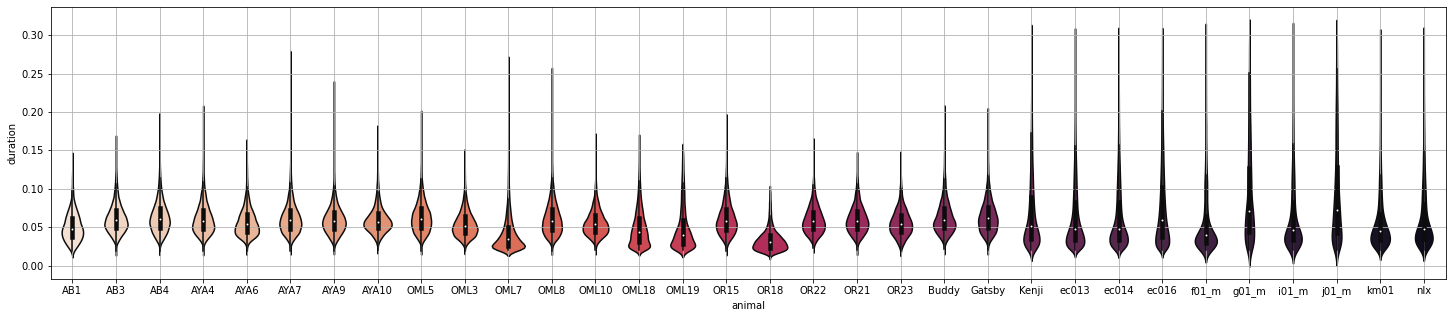

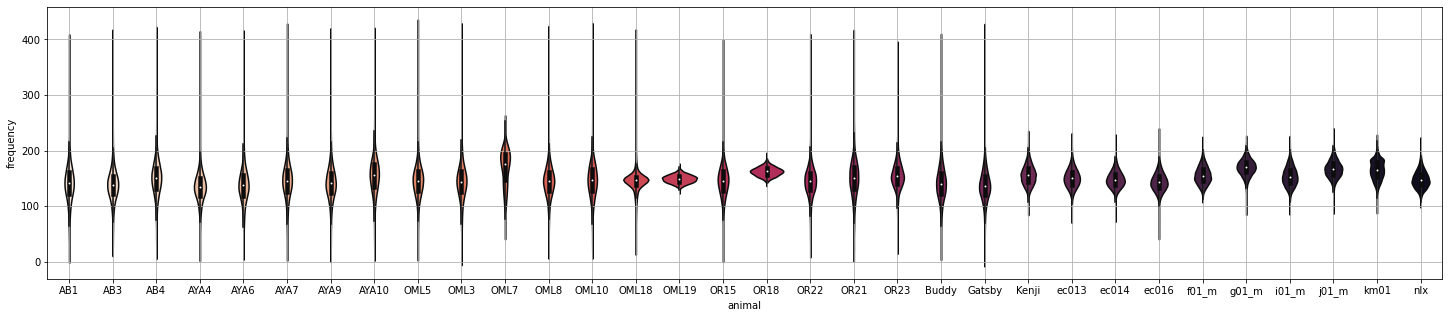

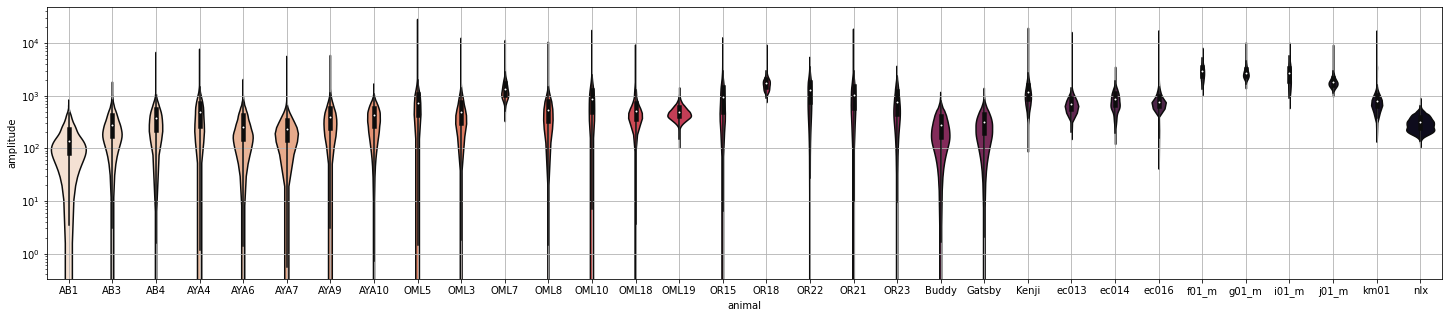

In [15]:
# g = sns.catplot(x="animal", y="duration",
#                 data=df, kind="strip",
#                 height=3, aspect=7,palette="rocket_r")
# plt.grid('on')                 
plt.figure(figsize=(25,5))
g = sns.violinplot(x="animal", y="duration", data=df,palette="rocket_r")
plt.grid('on')

plt.figure(figsize=(25,5))
g = sns.violinplot(x="animal", y="frequency", data=df,palette="rocket_r")
plt.grid('on')

plt.figure(figsize=(25,5))
g = sns.violinplot(x="animal", y="amplitude", data=df,palette="rocket_r")
plt.grid('on')
plt.yscale('log')